In [1]:
import panel as pn
import panel.widgets as pnw
import pandas as pd
import numpy as np
from panel.interact import interact
from IPython.display import Image
from IPython.core.display import HTML
import param
from pathlib import Path 
import hvplot.pandas
from holoviews import opts
pn.extension()

### Dataframes

In [2]:
mortality_file_path = Path('Resources/Mortality.csv', header = 0)
mortality_data = pd.read_csv(mortality_file_path)
mortality_data = mortality_data.drop(['Split', 'SplitSex', 'Forecast'], axis = 1)
mortality_data_country_indexed = mortality_data.set_index(mortality_data['CountryCode'])
mortality_data_country_indexed.drop(columns=['CountryCode'], inplace=True)
mortality_data_country_indexed['Date'] = pd.to_datetime(mortality_data_country_indexed.Year.astype(str), format='%Y') + \
             pd.to_timedelta(mortality_data_country_indexed.Week.mul(7).astype(str) + ' days')
mortality_data_country_indexed.drop(['Year', 'Week'], axis=1, inplace = True)
mortality_data_country_indexed.columns = ['Sex',
                                          'Deaths: 0-14 yrs',
                                          'Deaths: 15-64 yrs',
                                          'Deaths: 65-74 yrs',
                                          'Deaths: 75-84 yrs',
                                          'Deaths: 85+ yrs',
                                          'Deaths: Total',
                                          'Death Rate: 0-14 yrs',
                                          'Death Rate: 15-64 yrs',
                                          'Death Rate: 65-74 yrs',
                                          'Death Rate: 75-84 yrs',
                                          'Death Rate: 85+ yrs',
                                          'Death Rate: Total',
                                          'Date']

In [3]:
mortality_data_country_indexed

Sex  Deaths: 0-14 yrs  Deaths: 15-64 yrs  Deaths: 65-74 yrs  \
CountryCode                                                               
AUS2          m          5.800872         202.199128              206.0   
AUS2          f          6.758007         145.241993              161.0   
AUS2          b         12.558879         347.441121              367.0   
AUS2          m          3.205745         155.794255              195.0   
AUS2          f          5.181139         137.818861              143.0   
AUS2          b          8.386884         293.613116              338.0   
AUS2          m          4.732291         168.267709              239.0   
AUS2          f          6.983274         143.016726              165.0   
AUS2          b         11.715565         311.284435              404.0   
AUS2          m          2.747782         173.252218              204.0   
AUS2          f          5.181139         114.818861              150.0   
AUS2          b          7.928920         288.071080              354.0   
AUS2          m          3.969018         180.030982              209.0   
AUS2          f          6.532740         123.467260              146.0   
AUS2          b         10.501758         303.498242              355.0   
AUS2          m          4.732291         185.267709              232.0   
AUS2          f          6.082206         140.917794              176.0   
AUS2          b         10.814497         326.185503              408.0   
AUS2          m          4.732291         178.267709              217.0   
AUS2          f          5.181139         130.818861              119.0   
AUS2          b          9.913429         309.086571              336.0   
AUS2          m          6.106181         205.893819              240.0   
AUS2          f          5.856940         143.143060              150.0   
AUS2          b         11.963121         349.036879              390.0   
AUS2          m          4.579636         193.420364              217.0   
AUS2          f          6.082206         124.917794              134.0   
AUS2          b         10.661842         318.338158              351.0   
AUS2          m          4.732291         173.267709              242.0   
AUS2          f          6.307473         135.692527              165.0   
AUS2          b         11.039764         308.960236              407.0   
...          ..               ...                ...                ...   
USA           m        263.000000       11411.000000             9186.0   
USA           f        228.000000        6568.000000             6476.0   
USA           b        491.000000       17979.000000            15662.0   
USA           m        258.000000       11581.000000             9465.0   
USA           f        202.000000        6518.000000             6737.0   
USA           b        460.000000       18099.000000            16202.0   
USA           m        261.000000       11907.000000             9636.0   
USA           f        181.000000        6741.000000             6657.0   
USA           b        442.000000       18648.000000            16293.0   
USA           m        262.000000       12229.000000            10096.0   
USA           f        218.000000        6866.000000             6917.0   
USA           b        480.000000       19095.000000            17013.0   
USA           m        234.000000       12221.000000             9976.0   
USA           f        194.000000        6913.000000             6892.0   
USA           b        428.000000       19134.000000            16868.0   
USA           m        254.000000       12018.000000             9938.0   
USA           f        189.000000        6844.000000             7021.0   
USA           b        443.000000       18862.000000            16959.0   
USA           m        242.000000       11372.000000             9543.0   
USA           f        204.000000        6557.000000             6662.0   
USA           b        446.000000    

In [4]:
country_codes = mortality_data['CountryCode'].unique()

In [5]:
country_codes

array(['AUS2', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'CZE', 'DEUTNP',
       'DNK', 'ESP', 'EST', 'FIN', 'FRATNP', 'GBRTENW', 'GBR_NIR',
       'GBR_SCO', 'GRC', 'HRV', 'HUN', 'ISL', 'ISR', 'ITA', 'KOR', 'LTU',
       'LUX', 'LVA', 'NLD', 'NOR', 'NZL_NP', 'POL', 'PRT', 'RUS', 'SVK',
       'SVN', 'SWE', 'TWN', 'USA'], dtype=object)

In [6]:
country_dict = dict(zip(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Switzerland', 'Chile', 'Czech Republic', 'Germany', 'Denmark',
                                        'Spain', 'Estonia', 'Finland', 'France', 'England and Wales', 'Northern Ireland', 'Scotland', 'Greece', 
                                        'Croatia', 'Hungary', 'Iceland', 'Israel', 'Italy', 'South Korea', 'Lithuania', 'Luxembourg', 'Latvia', 
                                        'Netherlands', 'Norway', 'New Zealand', 'Poland', 'Portugal', 'Russia', 'Slovakia', 'Slovenia', 'Sweden', 'Taiwan', 'USA'], country_codes))
# print(country_dict)

In [7]:
country_dict

{'Australia': 'AUS2',
 'Austria': 'AUT',
 'Belgium': 'BEL',
 'Bulgaria': 'BGR',
 'Canada': 'CAN',
 'Switzerland': 'CHE',
 'Chile': 'CHL',
 'Czech Republic': 'CZE',
 'Germany': 'DEUTNP',
 'Denmark': 'DNK',
 'Spain': 'ESP',
 'Estonia': 'EST',
 'Finland': 'FIN',
 'France': 'FRATNP',
 'England and Wales': 'GBRTENW',
 'Northern Ireland': 'GBR_NIR',
 'Scotland': 'GBR_SCO',
 'Greece': 'GRC',
 'Croatia': 'HRV',
 'Hungary': 'HUN',
 'Iceland': 'ISL',
 'Israel': 'ISR',
 'Italy': 'ITA',
 'South Korea': 'KOR',
 'Lithuania': 'LTU',
 'Luxembourg': 'LUX',
 'Latvia': 'LVA',
 'Netherlands': 'NLD',
 'Norway': 'NOR',
 'New Zealand': 'NZL_NP',
 'Poland': 'POL',
 'Portugal': 'PRT',
 'Russia': 'RUS',
 'Slovakia': 'SVK',
 'Slovenia': 'SVN',
 'Sweden': 'SWE',
 'Taiwan': 'TWN',
 'USA': 'USA'}

## Todo:
- Create a multi dropdown menu that will select multiple countries at once
- Create either a dropdown or slider that will help group data by year
- Create an example of a dynamic graph that will update based on the selections above


---
## Dropdown selector construction

In [8]:
multi_select = pn.widgets.MultiSelect(name='Countries', value=['Australia'],
    options= country_dict, size=6)
multi_select

MultiSelect(name='Countries', options={'Australia': 'AUS2', ...}, size=6)

---
## Year slider/dropdown

In [15]:
year_slider = pn.widgets.IntRangeSlider(name='Years Slider', width=300, start=2015, end=2020, value=(2015, 2020), value_throttled=(2015, 2020))
year_slider

IntRangeSlider(end=2020, name='Years Slider', start=2015, value=(2015, 2020), value_throttled=(2015, 2020), width=300)

In [16]:
# Dynamic markup title for slider
@pn.depends(year_slider.param.value_throttled)
def year_range(year_slider):
    return '### Yearly Data Between {start} —  {end}'.format(start=year_slider[0], end=year_slider[1])

In [17]:
pn.Row(year_range)

Row
    [0] ParamFunction(function)

### Current issues:
When the notebook is left running for a long period of time, the slider will no longer work and will need to be reset. 

Additionally, the slider only seems to dynamically change the range/plots outside of the actual dashboard.

---

## Dynamic plots

In [12]:
# @pn.depends(year_slider.param.value_throttled)
# def plot_bar(year_slider):
#     years_df = mortality_data_country_indexed[mortality_data_country_indexed.Date.dt.year.between(year_slider[0], year_slider[1])]
#     return years_df.hvplot(x="Date", y=("Deaths: 0-14 yrs"), invert=False, height=400, groupby=["CountryCode", "Sex"])

# pn.Row(plot_bar)

In [21]:
# Dynamic plot with multiple x values

# Y value multiselector
y = pn.widgets.MultiSelect(name='Statistic', options=['Deaths: 0-14 yrs',
                                          'Deaths: 15-64 yrs',
                                          'Deaths: 65-74 yrs',
                                          'Deaths: 75-84 yrs',
                                          'Deaths: 85+ yrs',
                                          'Deaths: Total',
                                          'Death Rate: 0-14 yrs',
                                          'Death Rate: 15-64 yrs',
                                          'Death Rate: 65-74 yrs',
                                          'Death Rate: 75-84 yrs',
                                          'Death Rate: 85+ yrs',
                                          'Death Rate: Total'])

@pn.depends(year_slider.param.value_throttled)
def plot_bar(year_slider):
    years_df = mortality_data_country_indexed[mortality_data_country_indexed.Date.dt.year.between(year_slider[0], year_slider[1])]
    return years_df.hvplot(title='Deaths by Country and Sex', 
                           x = "Date", 
                           y = y, 
                           value_label = "Deaths and/or Death Rate", 
                           invert = False, 
                           height = 400, 
                           groupby = ["CountryCode", "Sex"], 
                           widget_location = 'left_top')

custom = pn.Column(pn.WidgetBox(y, year_slider), plot_bar)

In [42]:
custom

Column
    [0] WidgetBox
        [0] MultiSelect(name='Statistic', options=['Deaths: 0-14 yrs', ...], value=['Deaths: 15-64 yrs'])
        [1] IntRangeSlider(end=2020, name='Years Slider', start=2015, value=(2015, 2020), value_throttled=(2015, 2020), width=300)
    [1] ParamFunction(function)

### Current issues
(Update 6/29): Implemented a new multiselect widget which can dynamically change the Y axis on the graph. Integrated the year slider with the multiselect using a widgetbox. Grouping based on country code and sex are both still done on the hvplot itself, however, and the widgetbox does not appear to be operational on the actual dashboard.

---
## Dashboard testing

In [39]:
# Dashboard elements
dash_title = "# Country Mortality Analysis"

# Dashboard description
dash_desc = "Our project aims to visualize different metrics of COVID-19, specifically focusing on excess death"
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

# Dashboard logo
covid_logo_dict = pn.panel('Resources/covlogos.png', width=250, align='center')

header_box = pn.WidgetBox(dash_title, 
                          dash_desc, 
                          covid_logo_dict,
                          text)

main_box = pn.WidgetBox(year_range, 
#                         pn.Row(plot_bar),
                       custom)

In [40]:
dashboard = pn.Row(header_box, main_box, sizing_mode="stretch_width")


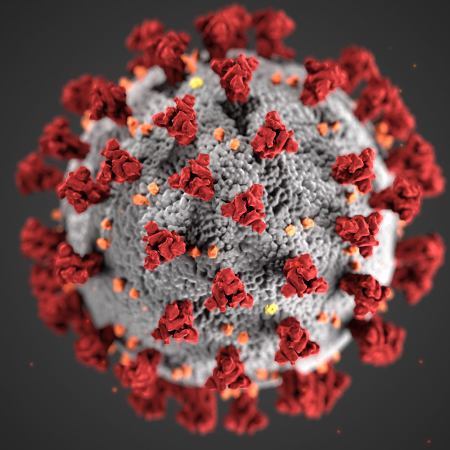

In [41]:
dashboard.embed()